# Curva di saturazione con i dati ricavati tramite imagej

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import scipy
from numpy import loadtxt
from scipy.optimize import curve_fit
import cv2

In [2]:
def lin (x,q,m):
    return q*x+m


# Buio

In [3]:
pathD=open('/home/andrea/Desktop/2022_11_03_flash_1mm/sat/Data/Buio.csv')

Dark=(np.loadtxt(pathD, delimiter='\t', dtype='float', skiprows=1))

print(Dark[:,2][0])

2106.814


# Dosi

In [4]:
path07Gy=open('/home/andrea/Desktop/2022_11_03_flash_1mm/sat/Data/07Gy.csv')

Gy07=(np.loadtxt(path07Gy, delimiter=',', dtype='float', skiprows=1))

M07=np.mean(Gy07[:,2]-Dark[:,2][0])
Dev07=np.mean(Gy07[:,3])

print('Grey value mean=',M07)
print('Dev st=',Dev07)

Grey value mean= 1481.5550000000003
Dev st= 889.8056666666666


In [5]:
path3Gy=open('/home/andrea/Desktop/2022_11_03_flash_1mm/sat/Data/3Gy.csv')

Gy3=(np.loadtxt(path3Gy, delimiter=',', dtype='float', skiprows=1))

M3=np.mean(Gy3[:,2]-Dark[:,2][1])
Dev3=np.mean(Gy3[:,3])

print('Grey value mean=',M3)
print('Dev st=',Dev3)

Grey value mean= 7416.345333333334
Dev st= 4470.824333333333


In [6]:
path6Gy=open('/home/andrea/Desktop/2022_11_03_flash_1mm/sat/Data/6Gy.csv')

Gy6=(np.loadtxt(path6Gy, delimiter=',', dtype='float', skiprows=1))

M6=np.mean(Gy6[:,2]-Dark[:,2][2])
Dev6=np.mean(Gy6[:,3])

print('Grey value mean=',M6)
print('Dev st=',Dev6)

Grey value mean= 11404.312333333333
Dev st= 6867.368333333333


In [7]:
path9Gy=open('/home/andrea/Desktop/2022_11_03_flash_1mm/sat/Data/9Gy.csv')

Gy9=(np.loadtxt(path9Gy, delimiter=',', dtype='float', skiprows=1))

M9=np.mean(Gy9[:,2]-Dark[:,2][3])
Dev9=np.mean(Gy9[:,3])

print('Grey value mean=',M9)
print('Dev st=',Dev9)

Grey value mean= 17275.345666666664
Dev st= 10374.295666666667


In [8]:
path12Gy=open('/home/andrea/Desktop/2022_11_03_flash_1mm/sat/Data/12Gy.csv')

Gy12=(np.loadtxt(path12Gy, delimiter=',', dtype='float', skiprows=1))

M12=np.mean(Gy12[:,2]-Dark[:,2][4])
Dev12=np.mean(Gy12[:,3])

print('Grey value mean=',M12)
print('Dev st=',Dev12)

Grey value mean= 23299.105
Dev st= 13917.286333333332


In [9]:
path15Gy=open('/home/andrea/Desktop/2022_11_03_flash_1mm/sat/Data/15Gy.csv')

Gy15=(np.loadtxt(path15Gy, delimiter=',', dtype='float', skiprows=1))

M15=np.mean(Gy15[:,2]-Dark[:,2][5])
Dev15=np.mean(Gy15[:,3])

print('Grey value mean=',M15)
print('Dev st=',Dev15)

Grey value mean= 27183.44266666667
Dev st= 16120.643666666665


In [10]:
path18Gy=open('/home/andrea/Desktop/2022_11_03_flash_1mm/sat/Data/18Gy.csv')

Gy18=(np.loadtxt(path18Gy, delimiter=',', dtype='float', skiprows=1))

M18=np.mean(Gy18[:,2]-Dark[:,2][6])
Dev18=np.mean(Gy18[:,3])

print('Grey value mean=',M18)
print('Dev st=',Dev18)

Grey value mean= 30914.78033333333
Dev st= 17906.711333333333


In [11]:
path20Gy=open('/home/andrea/Desktop/2022_11_03_flash_1mm/sat/Data/20Gy.csv')

Gy20=(np.loadtxt(path20Gy, delimiter=',', dtype='float', skiprows=1))

M20=np.mean(Gy20[:,2]-Dark[:,2][7])
Dev20=np.mean(Gy20[:,3])

print('Grey value mean=',M20)
print('Dev st=',Dev20)

Grey value mean= 33720.25033333333
Dev st= 19075.467999999997


In [12]:
path23Gy=open('/home/andrea/Desktop/2022_11_03_flash_1mm/sat/Data/23Gy.csv')

Gy23=(np.loadtxt(path23Gy, delimiter=',', dtype='float', skiprows=1))

M23=np.mean(Gy23[:,2]-Dark[:,2][8])
Dev23=np.mean(Gy23[:,3])

print('Grey value mean=',M23)
print('Dev st=',Dev23)

Grey value mean= 36872.65333333333
Dev st= 20171.286333333333


# Curva di saturazione

m= 1584.3600781690168 +/- 62.64848360245863
q= 2279.6188254998942 +/- 873.2143917515496
--------
Power_divergenceResult(statistic=1468.7142133906436, pvalue=7.8362243039e-312)


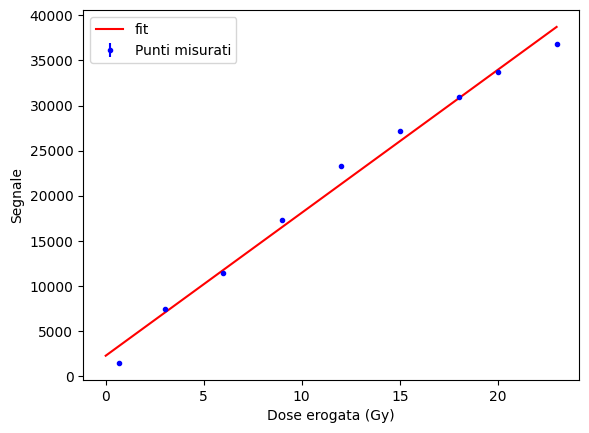

In [13]:
D=np.array([0.7,3,6,9,12,15,18,20,23]) #Dosi erogate

SatMean=np.array([M07, M3, M6, M9, M12, M15, M18, M20, M23]) #segnali letti dalla CCD
DevSt=np.array([Dev07, Dev3, Dev6, Dev9, Dev12, Dev15, Dev18, Dev20, Dev23]) #dev st dei segnali

x_cont=np.linspace(0,23,10000)

pars_D, cov_D=curve_fit(lin, D, SatMean, p0=[0,0], bounds=(-np.inf,np.inf))
p_sigma=np.sqrt(np.diag(cov_D))

plt.plot(x_cont, lin(x_cont,*pars_D),'r', label='fit')
plt.errorbar(D,SatMean, yerr=1, fmt='b.', label='Punti misurati')

plt.xlabel('Dose erogata (Gy)')
plt.ylabel('Segnale')

plt.legend();

#valori attesi
Y=pars_D[0]*D+pars_D[1]

#scipy.stats.chisquare(SatMean, Y)

#parametri della retta di fit
print('m=', pars_D[0],'+/-',p_sigma[0]) #coeff angolare
print('q=', pars_D[1],'+/-',p_sigma[1]) #intercetta
print('--------')
print(scipy.stats.chisquare(SatMean, Y))

m= 1865.9949333397458 +/- 86.88259738314653
q= 718.1237782671765 +/- 639.0331566615141
--------
Power_divergenceResult(statistic=363.742677963024, pvalue=1.8898472750026118e-77)


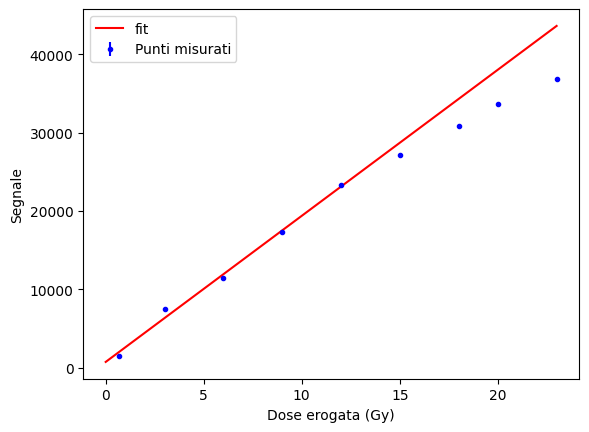

In [14]:
D1=np.array([0.7,3,6,9,12]) 
SatMean1=np.array([M07, M3, M6, M9, M12])


pars_D1, cov_D1=curve_fit(lin, D1, SatMean1, p0=[0,0], bounds=(-np.inf,np.inf))
p_sigma1=np.sqrt(np.diag(cov_D1))

plt.plot(x_cont, lin(x_cont,*pars_D1),'r', label='fit')
plt.errorbar(D,SatMean, yerr=1, fmt='b.', label='Punti misurati')

plt.xlabel('Dose erogata (Gy)')
plt.ylabel('Segnale')

plt.legend();

#valori attesi
Y1=pars_D1[0]*D1+pars_D1[1]


#parametri della retta di fit
print('m=', pars_D1[0],'+/-',p_sigma1[0]) #coeff angolare
print('q=', pars_D1[1],'+/-',p_sigma1[1]) #intercetta
print('--------')
print(scipy.stats.chisquare(SatMean1, Y1))

Non ho inserito nel grafico la dev st di imagej perchè troppo grande rispetto ai dati. Il secondo grafico è stato ottenuto fittando solo i primi 5 punti per osservare il discostamento dalla retta.

# - - - - - - - - - - - - - - - - - - - - -

# Ora provo a a rifare con i dati direttamente sottratti con imagej pixel a pixel (prima ho usato direttamente le medie calcolate da imagej alle quali ho sottratto il buio)

In [15]:
DataSat=open('/home/andrea/Desktop/2022_11_03_flash_1mm/sat/Data/ResultsComplete.csv')

Sat=(np.loadtxt(DataSat, delimiter=',', dtype='float', skiprows=1))


In [16]:
D=np.array([0.7,3,6,9,12,15,18,20,23]) #Dosi erogate

SatM=np.array([Sat[:,2][0], Sat[:,2][1], Sat[:,2][2], Sat[:,2][3], Sat[:,2][4], Sat[:,2][5], Sat[:,2][6], Sat[:,2][7], Sat[:,2][8]]) #segnali letti dalla CCD
Dev_St=np.array([Sat[:,3][0], Sat[:,3][1], Sat[:,3][2], Sat[:,3][3], Sat[:,3][4], Sat[:,3][5], Sat[:,3][6], Sat[:,3][7], Sat[:,3][8]]) #dev st dei segnali

print(SatM)
print(Dev_St)

[ 1444.048  7228.183 11114.754 16826.985 22690.299 26467.628 30083.751
 32797.033 35833.975]
[  928.037  4672.568  7179.628 10859.724 14580.973 16906.236 18833.21
 20118.308 21362.749]


m= 1539.9362200829003 +/- 61.66890130299829
q= 2241.717917172044 +/- 859.560686662443
--------
Power_divergenceResult(statistic=1451.8935597866648, pvalue=3.401562112709101e-308)


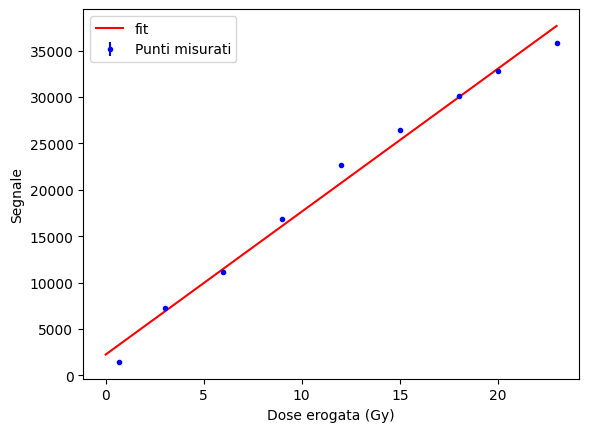

In [17]:
pars_Dj, cov_Dj=curve_fit(lin, D, SatM, p0=[0,0], bounds=(-np.inf,np.inf))
p_sigmaj=np.sqrt(np.diag(cov_Dj))

plt.plot(x_cont, lin(x_cont,*pars_Dj),'r', label='fit')
plt.errorbar(D,SatM, yerr=1, fmt='b.', label='Punti misurati')

plt.xlabel('Dose erogata (Gy)')
plt.ylabel('Segnale')

plt.legend();

#valori attesi
Y=pars_Dj[0]*D+pars_Dj[1]

#scipy.stats.chisquare(SatMean, Y)

#parametri della retta di fit
print('m=', pars_Dj[0],'+/-',p_sigmaj[0]) #coeff angolare
print('q=', pars_Dj[1],'+/-',p_sigmaj[1]) #intercetta
print('--------')
print(scipy.stats.chisquare(SatM, Y))

m= 1865.9949333397458 +/- 86.88259738314653
q= 718.1237782671765 +/- 639.0331566615141
--------
Power_divergenceResult(statistic=363.742677963024, pvalue=1.8898472750026118e-77)


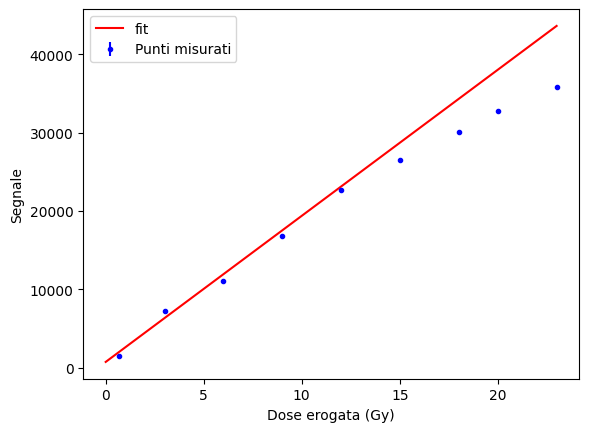

In [18]:
D1=np.array([0.7,3,6,9,12]) 
SatM1j=np.array([M07, M3, M6, M9, M12])


pars_D1j, cov_D1j=curve_fit(lin, D1, SatM1j, p0=[0,0], bounds=(-np.inf,np.inf))
p_sigma1j=np.sqrt(np.diag(cov_D1j))

plt.plot(x_cont, lin(x_cont,*pars_D1j),'r', label='fit')
plt.errorbar(D,SatM, yerr=1, fmt='b.', label='Punti misurati')

plt.xlabel('Dose erogata (Gy)')
plt.ylabel('Segnale')

plt.legend();

#valori attesi
Y1=pars_D1j[0]*D1+pars_D1j[1]


#parametri della retta di fit
print('m=', pars_D1j[0],'+/-',p_sigma1j[0]) #coeff angolare
print('q=', pars_D1j[1],'+/-',p_sigma1j[1]) #intercetta
print('--------')
print(scipy.stats.chisquare(SatM1j, Y1))

# Si ottengono gli stessi risultati

Problemi: usando imagej si media su un insiemedi pixel che, a causa della presenza di attack nella fibra, sono più scuri anche se si trovano nell'area in cui c'è segnale. Questo fa si che la deviazione standard che calcola imagej sia elevatissima poichè si trovano valori molto differenti che non si riescono ad escludere dalla roi.
Usando invece python anche per analizzare i pixel, si riescono ad eliminare tutti i valori sotto una certa soglia. Questo metodo però ha il problema che la scala di grigi di python è molto più ristretta (circa 500 valori contro 60000 di imagej).

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Elimino pixel bui dalla roi:

Per provare ad abbassare il valore di dev st. provo ad eliminare i pixel con luminosità nulla o luminosità mascherata dalla presenza di attack. In questo modo si provano a considerare solo i segnali realmente proporzionali alla luce ricevuta dalla fibra.

In [19]:
pathHist3Gy=open('/home/andrea/Desktop/2022_11_03_flash_1mm/sat/Data/Hist3Gy.csv')

Hist3=(np.loadtxt(pathHist3Gy, delimiter=',', dtype='float', skiprows=1))

#print(Hist3[:,1])
Hist3=Hist3[(Hist3!=0).all(1)] #Elimino i valori con 0 conteggi
A=np.array(Hist3[:,1])
B=np.array(Hist3[:,2])

#elimino i valori sotto a questa soglia e le corrispondenti classi di frequenza:
A1=[]
B1=[]
i=0
for i in range(0, len(A)):
    if A[i]>10000: 
        val=A[i]
        freq=B[i]
        
        A1.append(val)
        B1.append(freq)        

Devo ora pesare i valori per il numerodi volte che compaiono

In [20]:
A1=np.array(A1)
B1=np.array(B1)
Mean3=np.mean(A1*B1)
StDv3=np.std(A1*B1)
print(Mean3)
print(StDv3)

23781.690878787886
13892.384010620359


Moltiplico i valori dei pixel per le rispettive classi di freq. poi medio per avere il valore medio del segnale letto dalla CCD nella ROI, dopo aver escluso i punti più bui.
La deviazione standard rimane comunque molto alta. Si può provare a modificare la soglia ma si rischia di perdere tutti i dati.

# N.B

Non ho fatto tutti i file con questo procedimento perchè non so quanto sia conveniente perdere dati (bisogna discuterne). 